# Setup

In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

from platform import python_version
print(f'python version: {python_version()}')

Conda Environment: ROICaT
python version: 3.9.13


In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import natsort

import torch

import gc
import time
import functools
import multiprocessing as mp


In [3]:
tic = time.time()
toc = {}
toc['start'] = time.time() - tic

In [4]:
%load_ext autoreload
%autoreload 2
import roicat
# from roicat import helpers, data_importing, ROInet
# from roicat.tracking import alignment, blurring, clustering, scatteringWaveletTransformer, similarity_graph, visualization

In [5]:
from bnpm import file_helpers

In [6]:
%matplotlib notebook

# Import paths

In [7]:
# dir_allOuterFolders = Path(r"/media/rich/bigSSD/other lab data/Harnett_lab/ROI_Tracking/Vincent_Valerio/4th_email/AllStatFiles/rbp16").resolve()
# dir_allOuterFolders = Path(r"/media/rich/bigSSD/res2p/scanimage data/round 5 experiments/mouse 2_6/just_stat_files").resolve()
# dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/other lab data/Harvey_lab_ROIs/Sofia_ROIs/Data for Rich/SS33/").resolve())
# dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_1511L/statFiles/").resolve())
# dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/downloads_tmp/tmp_data/mouse_0322R/statFiles/").resolve())
dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8").resolve())
# dir_allOuterFolders = str(Path(r"/home/rich/Downloads/NN11/").resolve())
# dir_allOuterFolders = str(Path(r"/media/rich/bigSSD/downloads_tmp/NN9").resolve())

# folders_allSessions = natsort.natsorted(helpers.get_dir_contents(dir_allOuterFolders)[0])[:]

# dir_allS2pFolders = [dir_allOuterFolders / folder for folder in folders_allSessions]

pathSuffixToStat = 'stat.npy'
pathSuffixToOps = 'ops.npy'
# pathSuffixToStat = 'Slice02/stat.npy'
# pathSuffixToOps = 'Slice02/ops.npy'

# paths_allStat = np.array([path / pathSuffixToStat for path in dir_allS2pFolders])[:]
paths_allStat = test = roicat.helpers.find_paths(
    dir_outer=dir_allOuterFolders,
    reMatch=pathSuffixToStat,
    depth=4,
)[:]
# paths_allOps  = np.array([path / pathSuffixToOps for path in dir_allS2pFolders])[:]
paths_allOps = test = roicat.helpers.find_paths(
    dir_outer=dir_allOuterFolders,
    reMatch=pathSuffixToOps,
    depth=4,
)[:]
# paths_allStat = np.array([path / pathSuffixToStat for path in dir_allS2pFolders])
# paths_allOps  = np.array([path / pathSuffixToOps for path in dir_allS2pFolders])

# print(f'folder names of all sessions: \n{display(folders_allSessions)}')
print(f'paths to all stat files:');
[print(path) for path in paths_allStat];
print('');
print(f'paths to all ops files:');
[print(path) for path in paths_allOps];


paths to all stat files:
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210312/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210314/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210316/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210318/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210320/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210321/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210327/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210329/stat.npy
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210330/stat.npy

paths to all ops files:
/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210312

In [8]:
paths_allStat

['/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210312/stat.npy',
 '/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210314/stat.npy',
 '/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210316/stat.npy',
 '/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210318/stat.npy',
 '/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210320/stat.npy',
 '/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210321/stat.npy',
 '/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210327/stat.npy',
 '/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210329/stat.npy',
 '/media/rich/bigSSD/other lab data/Andermann_lab/Nghia_ROIs/all_data/plane_1/NN8/210330/stat.npy']

In [9]:
toc['import_paths'] = time.time() - tic

# Import data

In [10]:
toc['import_data'] = time.time() - tic

In [47]:
data = roicat.data_importing.Data_suite2p(
    paths_statFiles=paths_allStat[:],
    paths_opsFiles=paths_allOps[:],
    um_per_pixel=4.0,
    new_or_old_suite2p='new',

    out_height_width=[36,36],
    
    type_meanImg='meanImgE',
#     FOV_images=FOVs_mixed,

    verbose=True,
)

# data = roicat.data_importing.Data_suite2p(
#     paths_statFiles=paths_allStat[:],
# #     paths_opsFiles=paths_allOps[:],
#     um_per_pixel=4.0,
#     new_or_old_suite2p='new',

#     out_height_width=[36,36],
    
# #     type_meanImg='meanImgE',
#     FOV_images=FOVs_mixed,

#     verbose=True,
# )

assert data.check_completeness(verbose=False)['tracking'], f"Data object is missing attributes necessary for tracking."

Starting: Importing FOV images from ops files
Completed: Set FOV_height and FOV_width successfully.
Completed: Imported 9 FOV images.
Completed: Set FOV_images for 9 sessions successfully.
Importing spatial footprints from stat files.


100%|█████████████████████████████████████████████| 9/9 [00:10<00:00,  1.21s/it]


Imported 9 sessions of spatial footprints into sparse arrays.
Completed: Set spatialFootprints for 9 sessions successfully.
Completed: Created sessionID_concat.
Completed: Created centroids.
Staring: Creating centered ROI images from spatial footprints...
Completed: Created ROI images.


<IPython.core.display.Javascript object>


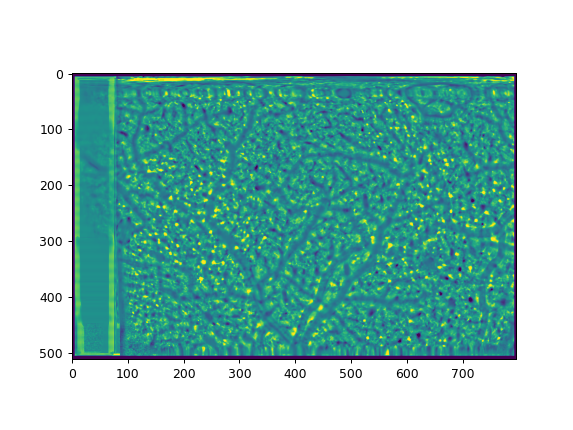

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


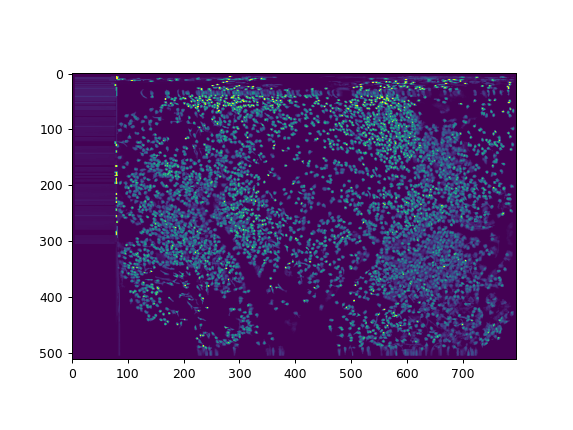

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


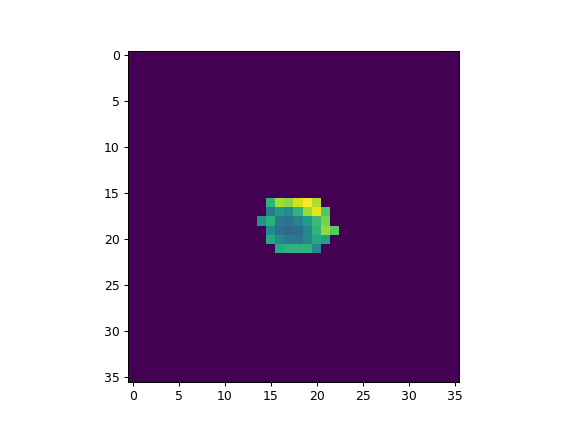

interactive(children=(IntSlider(value=0, description='i_frame', max=41363), Output()), _dom_classes=('widget-i…

In [238]:
%matplotlib notebook

roicat.visualization.display_toggle_image_stack(data.FOV_images, clim=[0,1])

roicat.visualization.display_toggle_image_stack([sf.max(0).reshape(data.FOV_height, data.FOV_width).toarray() for sf in data.spatialFootprints], clim=[0,0.1])

roicat.visualization.display_toggle_image_stack(np.concatenate(data.ROI_images, axis=0))

# Alignment

In [227]:
use_CLAHE = True

position_session_template = 0.5
roi_FOV_image_mixing_factor = 0.5

idx_st = int(position_session_template * data.n_sessions) if type(position_session_template) is float else position_session_template

FOV_images = [f + np.array(roi_FOV_image_mixing_factor*(sf.multiply(1/sf.max(1).A)).sum(0).reshape(data.FOV_height, data.FOV_width)) for f, sf in zip(data.FOV_images, data.spatialFootprints)]
FOV_images = [roicat.tracking.alignment.clahe(im, grid_size=1, clipLimit=1, normalize=True) for im in FOV_images] if use_CLAHE else FOV_images

# import copy
# FOV_images = copy.deepcopy(data.FOV_images)

<IPython.core.display.Javascript object>


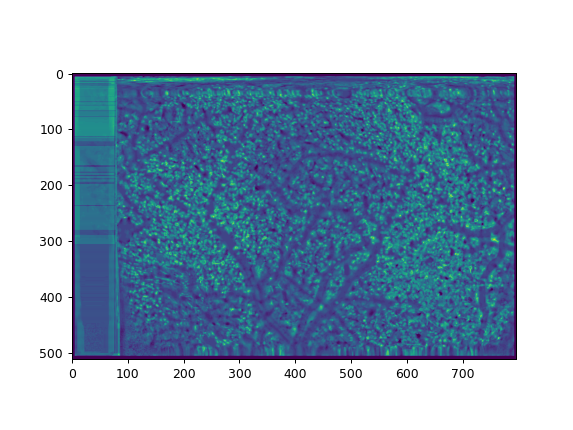

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

In [228]:
%matplotlib notebook

roicat.visualization.display_toggle_image_stack(FOV_images)

In [229]:
aligner = roicat.tracking.alignment.Aligner(verbose=True)
aligner.fit_geometric(
#     template=FOV_images[4],
    template=4,
    ims_moving=FOV_images,
    template_method='sequential',
    mode_transform='homography',
    mask_borders=(50,50,100,50),
    n_iter=50,
    termination_eps=1e-09,
    gaussFiltSize=31,
    auto_fix_gaussFilt_step=10,
)

aligner.transform_images_geometric(FOV_images);

Finding geometric registration warps with mode: homography, template_method: sequential, mask_borders: True


Finding geometric registration warps: 100%|███████| 9/9 [00:08<00:00,  1.03it/s]

Composing geometric warp matrices...
Applying geometric registration warps to images...


In [230]:
aligner.fit_nonrigid(
    template=FOV_images[4],
#     template=4,
    ims_moving=aligner.ims_registered_geo,
    remappingIdx_init=aligner.remappingIdx_geo,
    template_method='image',
    mode_transform='createOptFlow_DeepFlow',
    kwargs_mode_transform=None,
)

aligner.transform_images_nonrigid(FOV_images);

Finding nonrigid registration warps with mode: createOptFlow_DeepFlow, template_method: image


Finding nonrigid registration warps: 100%|█████| 9/9 [00:03<00:00,  2.44image/s]


Composing nonrigid warp matrices...
Applying nonrigid registration warps to images...


In [264]:
aligner.transform_ROIs(
    ROIs=data.spatialFootprints, 
    remappingIdx=aligner.remappingIdx_nonrigid,
    normalize=True,
);

Registering ROIs...



100%|██████████████████████████████████████| 4553/4553 [00:05<00:00, 801.86it/s]
/media/rich/Home_Linux_partition/github_repos/ROICaT/roicat/tracking/alignment.py:431: RuntimeWarning: divide by zero encountered in divide
  rois_aligned = rois_aligned.multiply(1/rois_aligned.sum(1))

100%|█████████████████████████████████████| 4589/4589 [00:03<00:00, 1293.06it/s]

100%|████████████████████████████████████| 4599/4599 [00:00<00:00, 16950.89it/s]

100%|█████████████████████████████████████| 4556/4556 [00:03<00:00, 1291.95it/s]

100%|█████████████████████████████████████| 4602/4602 [00:03<00:00, 1345.95it/s]

100%|█████████████████████████████████████| 4531/4531 [00:01<00:00, 3882.19it/s]

100%|█████████████████████████████████████| 4630/4630 [00:04<00:00, 1100.82it/s]

100%|█████████████████████████████████████| 4671/4671 [00:01<00:00, 3640.93it/s]

100%|█████████████████████████████████████| 4633/4633 [00:04<00:00, 1091.56it/s]

Registering ROIs: 100%|███████████████████████████| 9/9 [00

[<4553x407552 sparse matrix of type '<class 'numpy.float32'>'
 	with 158062 stored elements in Compressed Sparse Row format>,
 <4589x407552 sparse matrix of type '<class 'numpy.float32'>'
 	with 156927 stored elements in Compressed Sparse Row format>,
 <4599x407552 sparse matrix of type '<class 'numpy.float32'>'
 	with 140019 stored elements in Compressed Sparse Row format>,
 <4556x407552 sparse matrix of type '<class 'numpy.float32'>'
 	with 168019 stored elements in Compressed Sparse Row format>,
 <4602x407552 sparse matrix of type '<class 'numpy.float32'>'
 	with 194221 stored elements in Compressed Sparse Row format>,
 <4531x407552 sparse matrix of type '<class 'numpy.float32'>'
 	with 167846 stored elements in Compressed Sparse Row format>,
 <4630x407552 sparse matrix of type '<class 'numpy.float32'>'
 	with 154018 stored elements in Compressed Sparse Row format>,
 <4671x407552 sparse matrix of type '<class 'numpy.float32'>'
 	with 160539 stored elements in Compressed Sparse Row f

<IPython.core.display.Javascript object>


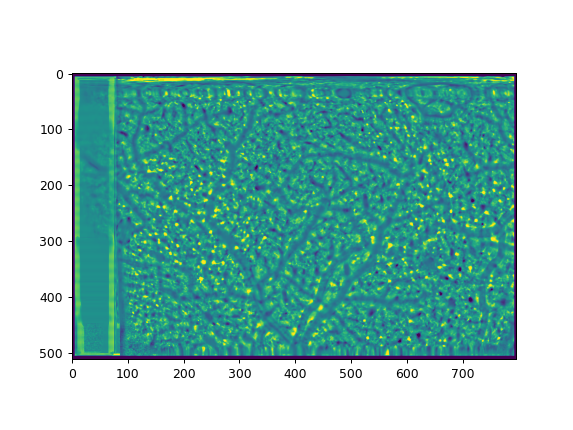

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


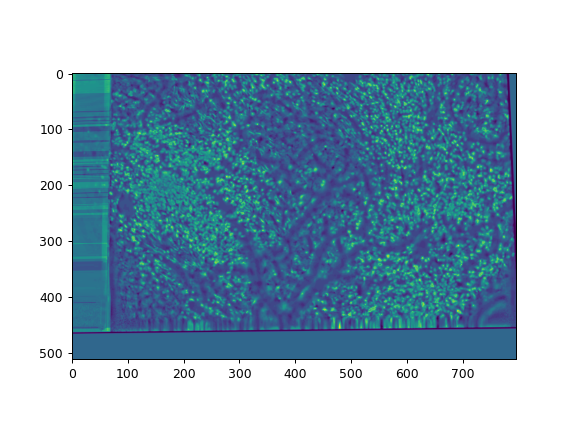

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


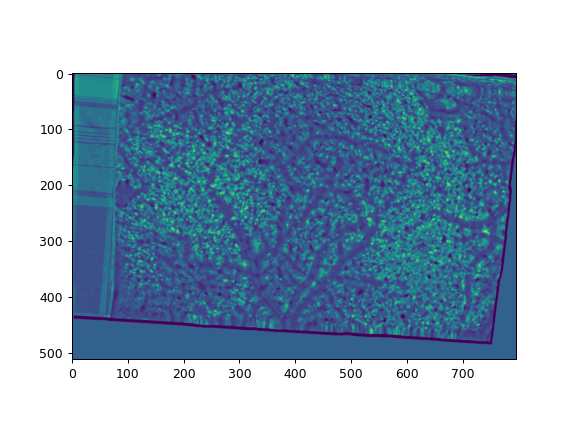

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


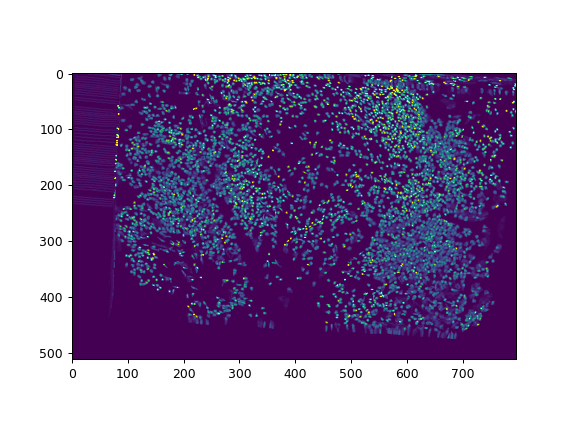

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

<IPython.core.display.Javascript object>


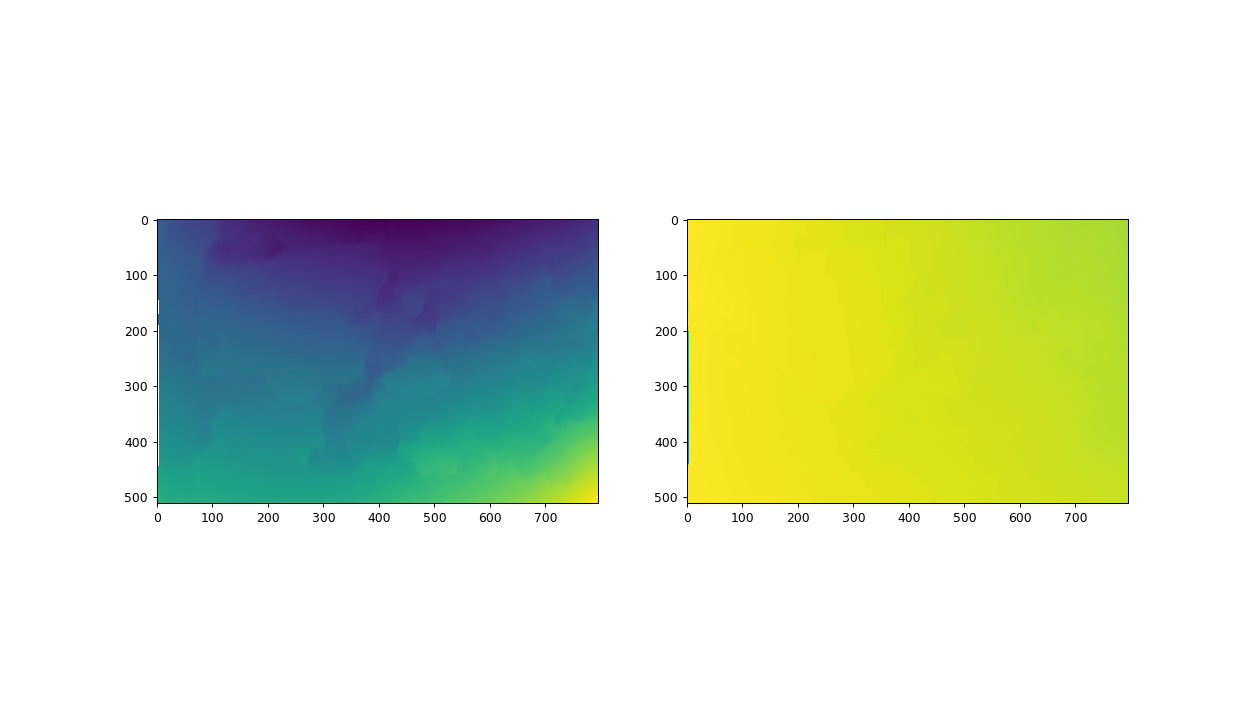

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

In [293]:
%matplotlib notebook

roicat.visualization.display_toggle_image_stack(data.FOV_images)
roicat.visualization.display_toggle_image_stack(aligner.ims_registered_geo)
roicat.visualization.display_toggle_image_stack(aligner.ims_registered_nonrigid)
roicat.visualization.display_toggle_image_stack(aligner.get_ROIsAligned_maxIntensityProjection(), clim=[0,0.1])
roicat.visualization.display_toggle_2channel_image_stack(aligner.get_flowFields())

In [26]:
toc['alignment'] = time.time() - tic

## Blur ROIs (optional)

In [269]:
blurrer = roicat.tracking.blurring.ROI_Blurrer(
    frame_shape=(data.FOV_height, data.FOV_width),
    kernel_halfWidth=2,
    plot_kernel=False,
)

blurrer.blur_ROIs(
    spatialFootprints=aligner.ROIs_aligned[:],
)

Preparing the Toeplitz convolution matrix
Performing convolution for blurring


<IPython.core.display.Javascript object>


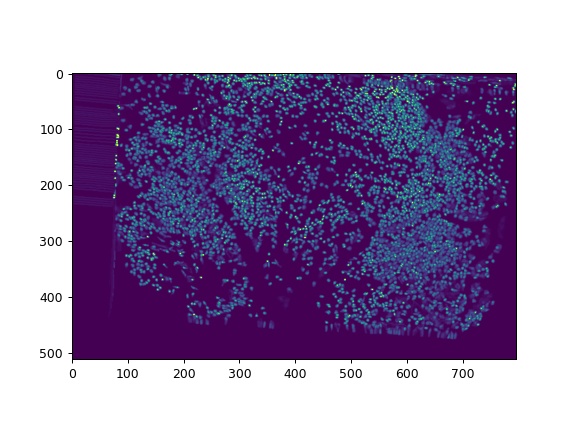

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

In [270]:
%matplotlib notebook
roicat.visualization.display_toggle_image_stack(blurrer.get_ROIsBlurred_maxIntensityProjection(), clim=[0,0.1])

In [35]:
toc['blur'] = time.time() - tic

## Neural network embedding distances

In [271]:
roinet = roicat.ROInet.ROInet_embedder(
    device='cuda:0',
    dir_networkFiles=r'/home/rich/Desktop/tmp_data/',
    download_method='check_local_first',
    download_url='https://osf.io/x3fd2/download',
    download_hash='7a5fb8ad94b110037785a46b9463ea94',
    forward_pass_version='latent',
    verbose=True,
)

File already exists locally: /home/rich/Desktop/tmp_data/ROInet.zip
Hash of local file matches provided hash_hex.
Extracting /home/rich/Desktop/tmp_data/ROInet.zip to /home/rich/Desktop/tmp_data.
Completed zip extraction.
['/home/rich/Desktop/tmp_data/ROInet_tracking_20220527', '/home/rich/Desktop/tmp_data/ROInet_tracking_20220527/params.json', '/home/rich/Desktop/tmp_data/ROInet_tracking_20220527/ReadMe.txt', '/home/rich/Desktop/tmp_data/ROInet_tracking_20220527/model.py', '/home/rich/Desktop/tmp_data/ROInet_tracking_20220527/ConvNext_tiny__1_0_best__simCLR.pth']
Imported model from /home/rich/Desktop/tmp_data/ROInet_tracking_20220527/model.py
Loaded params_model from /home/rich/Desktop/tmp_data/ROInet_tracking_20220527/params.json


/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Generated network using params_model
Loaded state_dict into network from /home/rich/Desktop/tmp_data/ROInet_tracking_20220527/ConvNext_tiny__1_0_best__simCLR.pth
Loaded network onto device cuda:0


In [272]:
roinet.generate_dataloader(
    ROI_images=data.ROI_images,
    um_per_pixel=data.um_per_pixel,
    pref_plot=False,
    
    jit_script_transforms=True,
    
    batchSize_dataloader=8,
    pinMemory_dataloader=True,
    numWorkers_dataloader=mp.cpu_count(),
    persistentWorkers_dataloader=True,
    prefetchFactor_dataloader=2,    

#     batchSize_dataloader=1,
#     pinMemory_dataloader=False,
#     numWorkers_dataloader=0,
#     persistentWorkers_dataloader=False,
#     prefetchFactor_dataloader=2,    
);

Starting: resizing ROIs
Completed: resizing ROIs
Defined image transformations: Sequential(
  (0): ScaleDynamicRange(scaler_bounds=(0, 1))
  (1): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
  (2): TileChannels(dim=0)
)
Defined dataset
Defined dataloader


/media/rich/Home_Linux_partition/github_repos/ROICaT/roicat/ROInet.py:325: UserWarning: 


  warnings.warn("\n\nWarning: Converting transforms to a jit-based script has been known to cause issues on Windows when numWorkers_dataloader > 0. If self.generate_latents() raises an Exception similar to 'Tried to serialize object __torch__.torch.nn.modules.container.Sequential which does not have a __getstate__ method defined!' consider setting numWorkers_dataloader=0 or jit_script_transforms=False.\n")


<IPython.core.display.Javascript object>


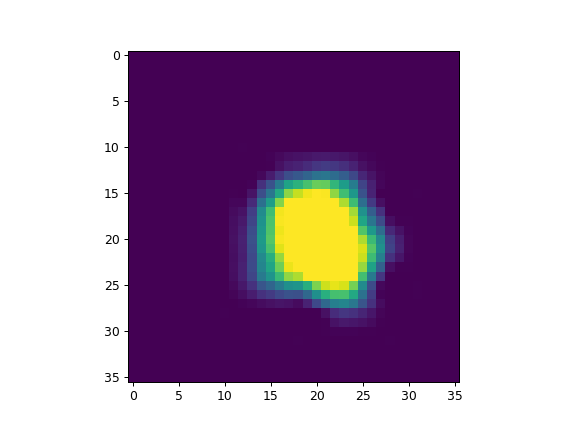

interactive(children=(IntSlider(value=0, description='i_frame', max=41363), Output()), _dom_classes=('widget-i…

In [273]:
%matplotlib notebook
roicat.visualization.display_toggle_image_stack(roinet.ROI_images_rs, clim=[0, 0.05])

In [274]:
roinet.generate_latents();


starting: running data through network


  0%|                                                  | 0/5171 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int =

/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %247 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggere

completed: running data through network


In [275]:
gc.collect()
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

In [276]:
toc['NN'] = time.time() - tic

## Scattering wavelet embedding distances

In [277]:
swt = roicat.tracking.scatteringWaveletTransformer.SWT(
    kwargs_Scattering2D={'J': 2, 'L': 2}, 
    image_shape=data.ROI_images[0].shape[1:3], 
    device='cuda:0'
)

swt.transform(
    ROI_images=np.concatenate(data.ROI_images, axis=0),
    batch_size=100,
);

SWT initialized
Starting: SWT transform on ROIs


  0%|                                                | 0/413.64 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|█████████████████████████████████████| 414/413.64 [00:01<00:00, 375.77it/s]

Completed: SWT transform on ROIs


In [278]:
gc.collect()
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()


In [279]:
toc['SWT'] = time.time() - tic

## Compute similarities

<IPython.core.display.Javascript object>


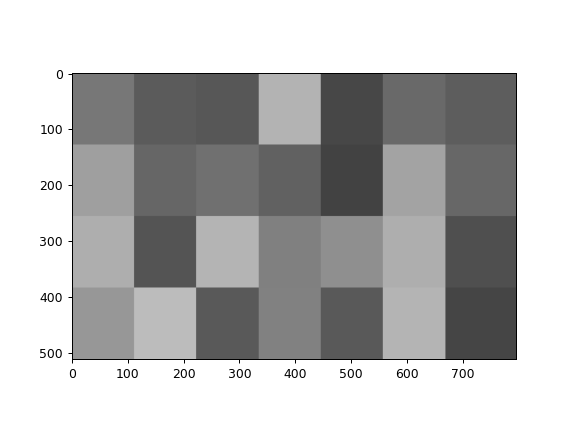

Computing pairwise similarity between ROIs...


100%|███████████████████████████████████████████| 28/28 [00:13<00:00,  2.15it/s]


Joining blocks into full similarity matrices...
Joining s_sf...


17110it [00:13, 1315.66it/s]                                                    


Joining s_NN...


17110it [00:13, 1269.27it/s]                                                    


Joining s_SWT...


17110it [00:13, 1303.21it/s]                                                    


Joining s_sesh...


17110it [00:14, 1217.76it/s]                                                    


In [280]:
sim = roicat.tracking.similarity_graph.ROI_graph(
    n_workers=-1,
    frame_height=data.FOV_height,
    frame_width=data.FOV_width,
#     block_height=data.FOV_height,
#     block_width=data.FOV_width,
    block_height=64,
    block_width=64,
    algorithm_nearestNeigbors_spatialFootprints='brute',
    verbose=True,
)

sim.visualize_blocks()

s_sf, s_NN, s_SWT, s_sesh = sim.compute_similarity_blockwise(
    spatialFootprints=blurrer.ROIs_blurred,
#     spatialFootprints=aligner.ROIs_aligned,
    features_NN=roinet.latents,
    features_SWT=swt.latents,
    ROI_session_bool=data.sessionID_concat,
    spatialFootprint_maskPower=1.0,
);

In [281]:
sim.make_normalized_similarities(
    centers_of_mass=data.centroids,
    features_NN=roinet.latents,
    features_SWT=swt.latents,
#     features_SWT=None,
    k_max=4000,
    k_min=100,
    algo_NN='kd_tree',
    device='cuda:0'
)

toc['sim'] = time.time() - tic

Finding k-range of center of mass distance neighbors for each ROI...
Normalizing Neural Network similarity scores...


100%|██████████████████████████████████| 41364/41364 [00:03<00:00, 12322.10it/s]


Normalizing SWT similarity scores...


100%|███████████████████████████████████| 41364/41364 [00:04<00:00, 9849.28it/s]


# Clustering

In [282]:
clusterer = roicat.tracking.clustering.Clusterer(
    s_sf=sim.s_sf,
    s_NN_z=sim.s_NN_z,
    s_SWT_z=sim.s_SWT_z,
    s_sesh=sim.s_sesh,
)

kwargs_makeConjunctiveDistanceMatrix_best = clusterer.find_optimal_parameters_for_pruning(
    n_bins=50,
    find_parameters_automatically=True,
    kwargs_findParameters={
        'n_patience': 100,
        'tol_frac': 0.05,
        'max_trials': 350,
        'max_duration': 60*10,
        'verbose': False,
    },
    bounds_findParameters={
        'power_SF': (0.3, 2),
        'power_NN': (0.2, 2),
        'power_SWT': (0.1, 1),
        'p_norm': (-5, 5),
        'sig_NN_kwargs_mu': (0, 0.5),
        'sig_NN_kwargs_b': (0.05, 2),
        'sig_SWT_kwargs_mu': (0, 0.5),
        'sig_SWT_kwargs_b': (0.05, 2),
    },
    n_jobs_findParameters=-1,    
#     fallback_d_cutoff=0.5,
#     plot_pref=True,
)

toc['separate_diffSame'] = time.time() - tic

Finding mixing parameters using automated hyperparameter tuning...
Best value found: 0.1374584287405014 with parameters {'power_SF': 1.6133555181433787, 'power_NN': 0.6829733566170171, 'power_SWT': 0.19364962298368937, 'p_norm': -3.8766502346829057, 'sig_SF_kwargs': None, 'sig_NN_kwargs': {'mu': 0.40758052906663134, 'b': 0.5812535628022021}, 'sig_SWT_kwargs': {'mu': 0.3464735399620159, 'b': 1.4015944415933665}}


<IPython.core.display.Javascript object>


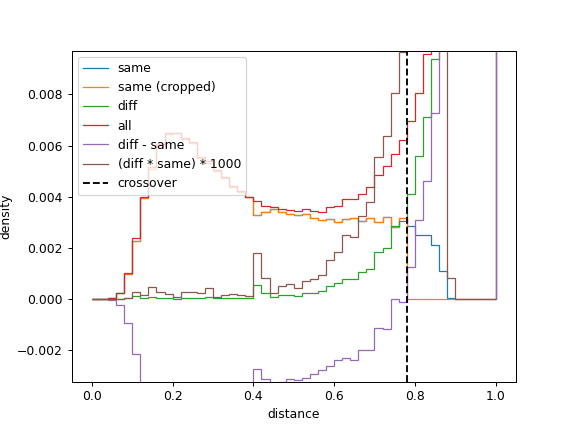

<IPython.core.display.Javascript object>


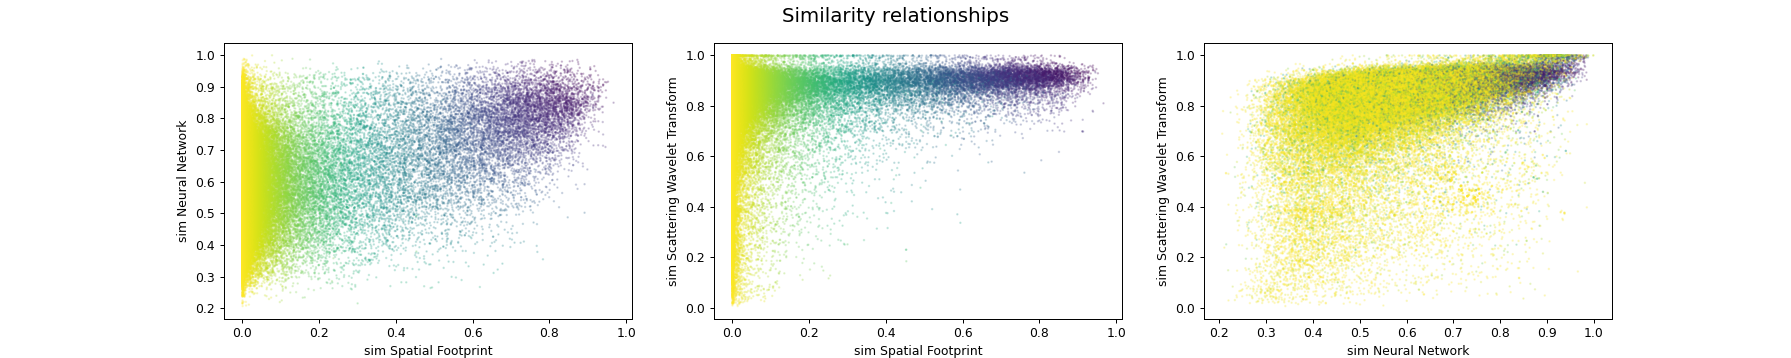

In [283]:
clusterer.plot_distSame()

clusterer.plot_similarity_relationships(
    plots_to_show=[1,2,3], 
    max_samples=100000, 
    kwargs_scatter={'s':1, 'alpha':0.2},
    kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
#     kwargs_makeConjunctiveDistanceMatrix={
#         'power_SF': 1.0,
#         'power_NN': 1.0,
#         'power_SWT': 0.1,
#         'p_norm': -4.0,
#         'sig_SF_kwargs': {'mu':0.5, 'b':4},
# #         'sig_SF_kwargs': None,
#         'sig_NN_kwargs': {'mu':0.5, 'b':1.5},
#         'sig_SWT_kwargs': {'mu':0.5, 'b':0.5},
#     },
);

In [289]:
clusterer.make_pruned_similarity_graphs(
    d_cutoff=None,
    kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
    stringency=0.8,
)

In [285]:
if data.n_sessions >= 8:
    labels = clusterer.fit(
        session_bool=data.sessionID_concat,
        min_cluster_size=2,
        cluster_selection_method='leaf',
        d_clusterMerge=None,
        alpha=0.999,
        n_iter_violationCorrection=4,
        d_conj=clusterer.dConj_pruned,
#             kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
    #     kwargs_makeConjunctiveDistanceMatrix={
    #         'power_SF': 1.0,
    #         'power_NN': 1.0,
    #         'power_SWT': 0.1,
    #         'p_norm': -2,
    #         'sig_SF_kwargs': None,
    #         'sig_NN_kwargs':  {'mu':0, 'b':0.2},
    #         'sig_SWT_kwargs': {'mu':0, 'b':0.2},
    #     },
        split_intraSession_clusters=True,
        discard_failed_pruning=True,
        d_step=0.02,
    )

else:
    labels = clusterer.fit_sequentialHungarian(
        session_bool=data.sessionID_concat,
        thresh_cost=0.6,
        d_conj=clusterer.dConj_pruned,
#             kwargs_makeConjunctiveDistanceMatrix=kwargs_makeConjunctiveDistanceMatrix_best,
    #     kwargs_makeConjunctiveDistanceMatrix={
    #     'power_SF': 1.0,
    #     'power_NN': 1.0,
    #     'power_SWT': 0.1,
    #     'p_norm': -2,
    #     'sig_SF_kwargs': None,
    #     'sig_NN_kwargs':  {'mu':0, 'b':0.2},
    #     'sig_SWT_kwargs': {'mu':0, 'b':0.2},
    #     },
    )

clusterer.compute_cluster_quality_metrics(
    sim_mat=clusterer.sConj, 
    labels=clusterer.labels,
)

labels_bySession = [labels[idx] for idx in data.sessionID_concat.T]

Fitting with HDBSCAN and splitting clusters with multiple ROIs per session


  0%|                                                     | 0/6 [00:00<?, ?it/s]/media/rich/OS/Users/Richard/Linux_stuff_on_OS/conda_envs/envs/ROICaT/lib/python3.9/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
100%|█████████████████████████████████████████████| 6/6 [04:35<00:00, 45.89s/it]


In [286]:
## results_clustering
print(f'Number of clusters: {len(np.unique(labels))}')
print(f'Number of discarded ROIs: {(labels==-1).sum()}')

Number of clusters: 6569
Number of discarded ROIs: 9851


In [287]:
toc['clustering'] = time.time() - tic

# Visualize results

In [288]:
FOV_clusters = roicat.visualization.compute_colored_FOV(
    spatialFootprints=[r.power(0.7) for r in aligner.ROIs_aligned],
    FOV_height=data.FOV_height,
    FOV_width=data.FOV_width,
    boolSessionID=data.sessionID_concat,
    labels=labels,
    alphas=None,
)

/media/rich/Home_Linux_partition/github_repos/ROICaT/roicat/visualization.py:124: RuntimeWarning: divide by zero encountered in divide
  rois = rois.multiply(1.2/rois.max(1).A).power(1)


<IPython.core.display.Javascript object>


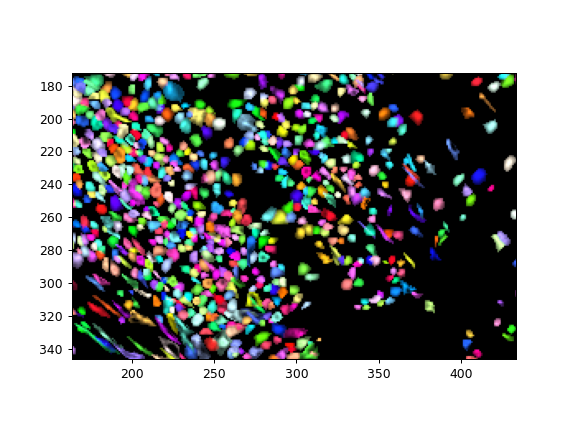

interactive(children=(IntSlider(value=0, description='i_frame', max=8), Output()), _dom_classes=('widget-inter…

In [290]:
%matplotlib notebook
roicat.visualization.display_toggle_image_stack(
    FOV_clusters, 
#     interpolation='none', 
#     filternorm=False, 
#     resample=False
)

In [45]:
# visualization.display_toggle_image_stack(aligner.get_ROIsAligned_maxIntensityProjection())

/tmp/ipykernel_802061/3423584665.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(40,1))


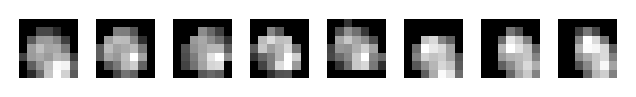

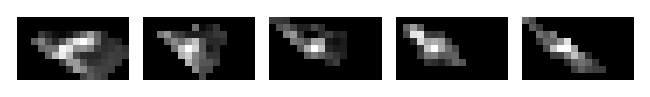

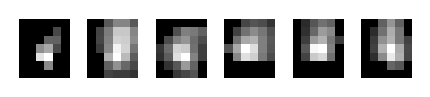

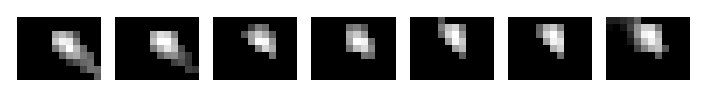

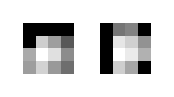

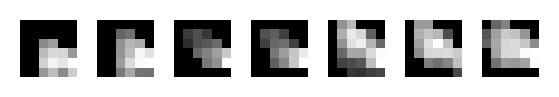

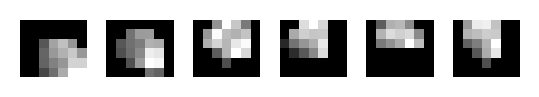

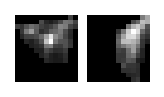

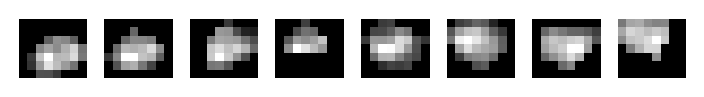

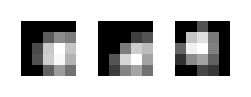

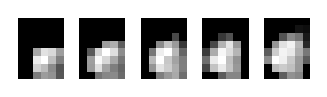

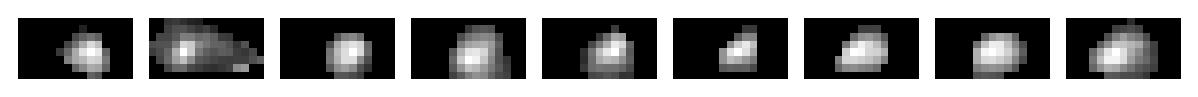

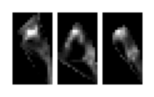

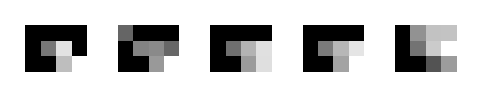

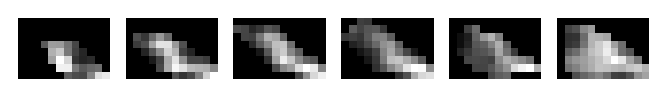

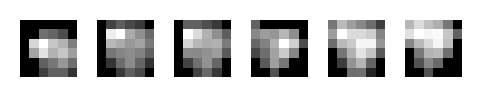

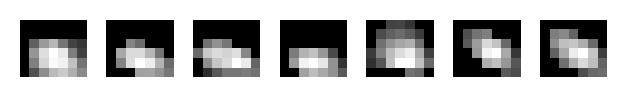

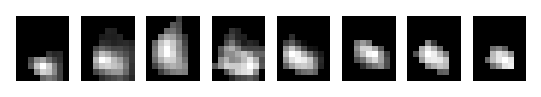

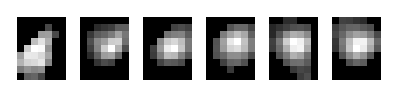

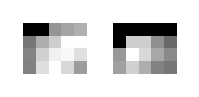

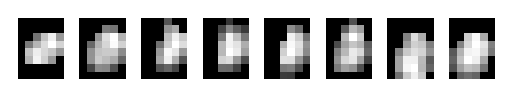

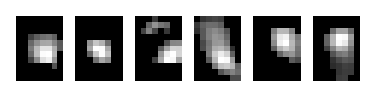

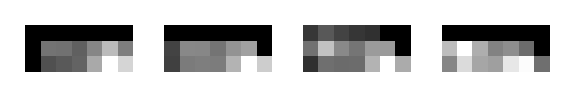

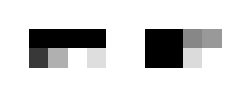

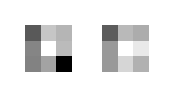

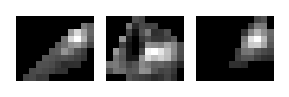

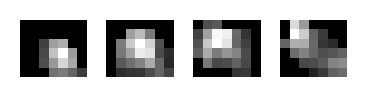

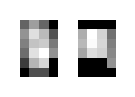

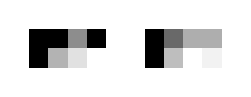

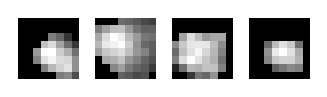

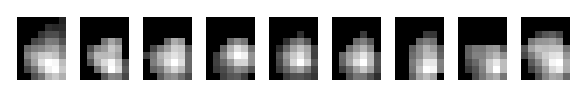

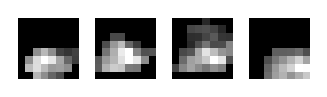

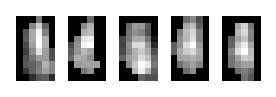

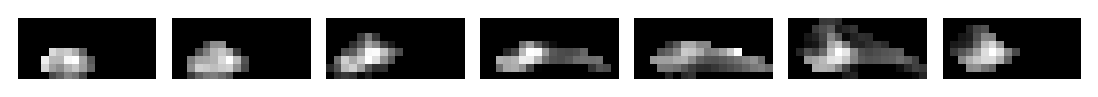

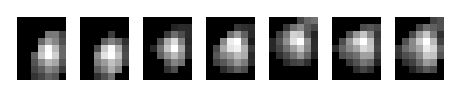

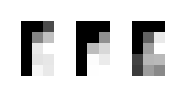

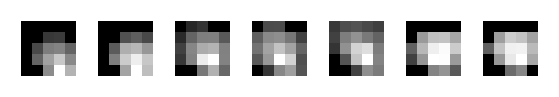

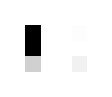

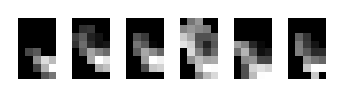

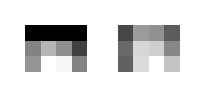

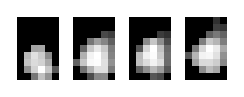

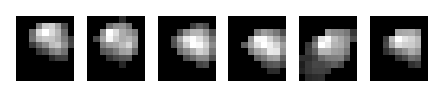

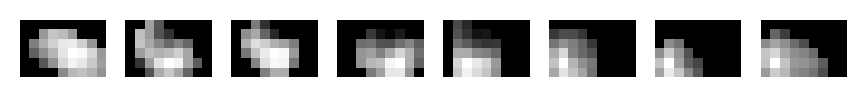

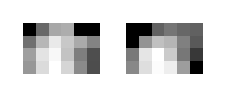

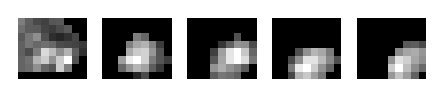

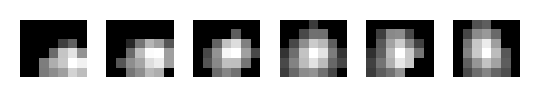

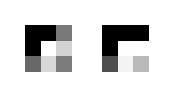

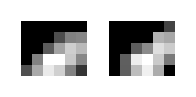

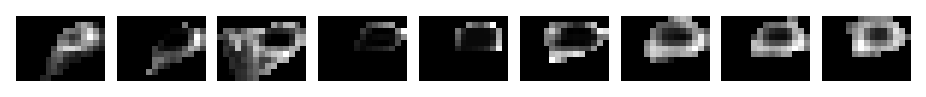

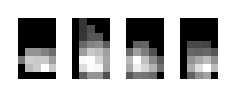

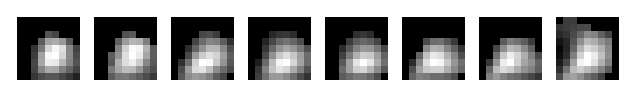

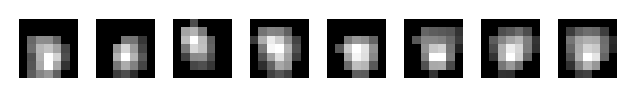

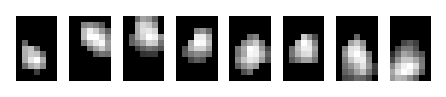

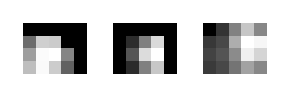

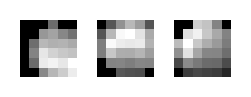

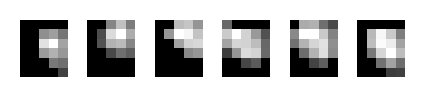

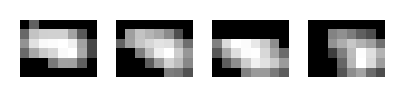

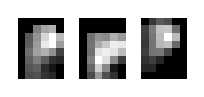

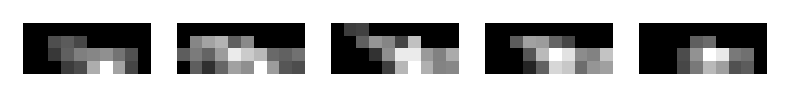

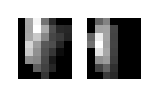

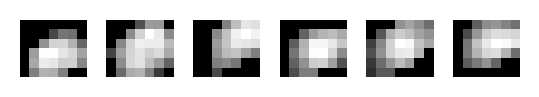

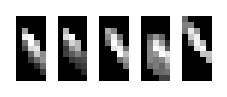

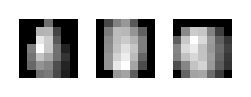

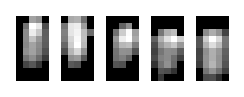

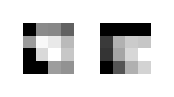

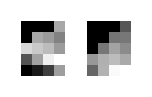

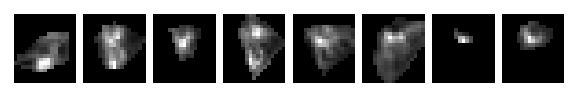

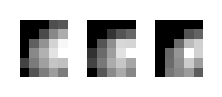

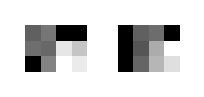

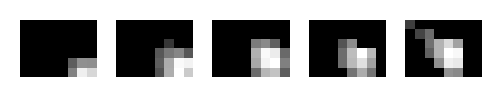

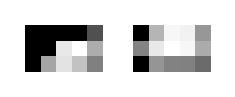

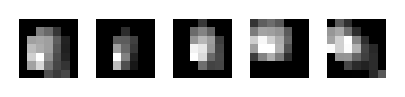

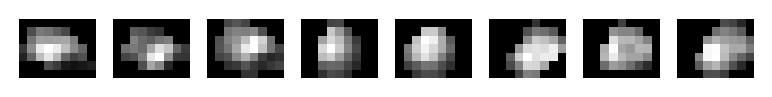

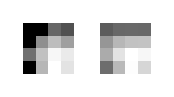

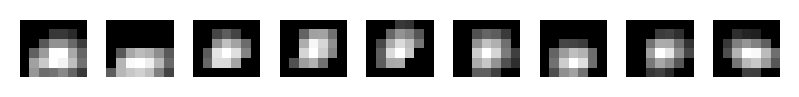

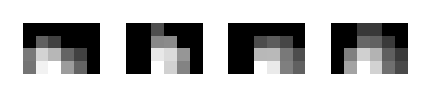

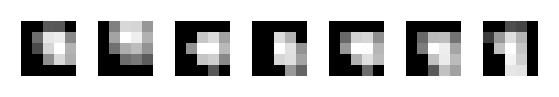

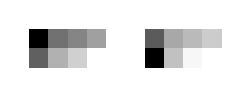

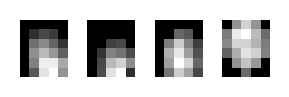

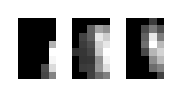

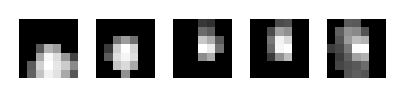

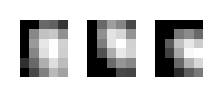

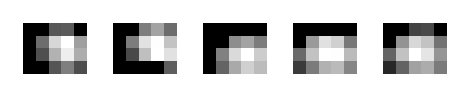

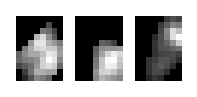

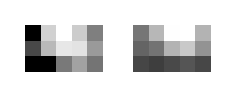

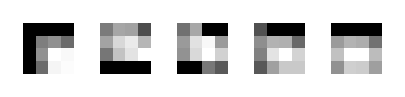

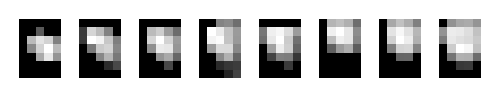

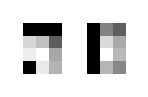

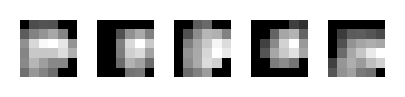

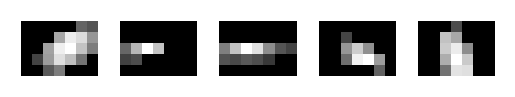

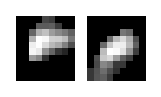

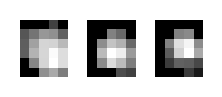

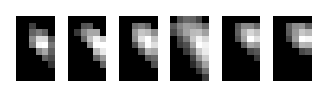

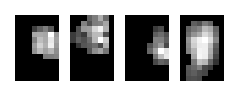

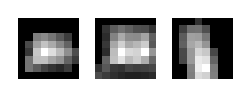

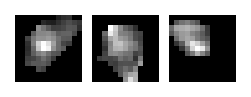

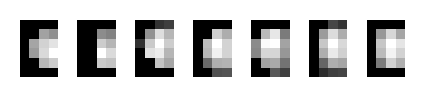

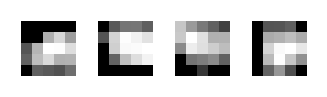

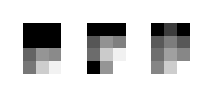

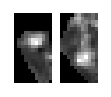

In [291]:
import scipy.sparse

ucids = labels.copy()
# ucids = ucids[ucids==975]
ucids_unique = np.unique(ucids[ucids>-1])

# ROI_ims = np.concatenate(data.ROI_images, axis=0)
ROI_ims_sparse = scipy.sparse.vstack(aligner.ROIs_aligned)
ROI_ims_sparse = ROI_ims_sparse.multiply( ROI_ims_sparse.max(1).power(-1) ).tocsr()


ucid_sfCat = []
for ucid in ucids_unique:
    idx = np.where(ucids == ucid)[0]
    ucid_sfCat.append( np.concatenate(list(roicat.visualization.crop_cluster_ims(ROI_ims_sparse[idx].toarray().reshape(len(idx), data.FOV_height, data.FOV_width))), axis=1) )
#     ucid_sfCat.append( np.concatenate(list(ROI_ims_sparse[idx].toarray().reshape(len(idx), data.FOV_height, data.FOV_width)), axis=1) )
# data.ROI_images[i_sesh][idx] for 


%matplotlib inline

for sf in ucid_sfCat[:100]:
    plt.figure(figsize=(40,1))
    plt.imshow(sf, cmap='gray')
    plt.axis('off')

<IPython.core.display.Javascript object>


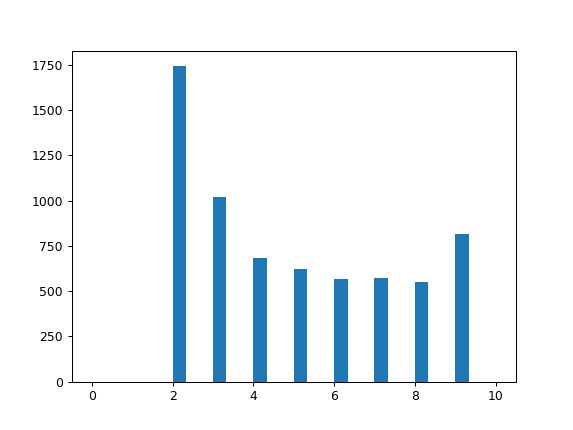

In [292]:
%matplotlib notebook

_, counts = np.unique(labels, return_counts=True)

plt.figure()
plt.hist(counts, 30, range=(0, data.n_sessions+1));


In [83]:
toc['visualize'] = time.time() - tic

# Save results

In [84]:
dir_save = Path('/home/rich/Desktop/').resolve()
# name_save = Path(dir_allOuterFolders).resolve().name
name_save = 'mouse_0322R'
# path_save = dir_save / (name_save + '.ROICaT.tracking.results' + '.pkl')
path_save = dir_save / (name_save + '.ROICaT.tracking.results.DAY0_2' + '.pkl')
print(f'path_save: {path_save}')

path_save: /home/rich/Desktop/mouse_0322R.ROICaT.tracking.results.DAY0_2.pkl


In [85]:
ROIs = {
    "ROIs_aligned": aligner.ROIs_aligned,
    "ROIs_raw": data.spatialFootprints,
    "frame_height": data.FOV_height,
    "frame_width": data.FOV_width,
    "idx_roi_session": np.where(data.sessionID_concat)[1]
}

results = {
    "UCIDs": labels,
    "UCIDs_bySession": labels_bySession,
    "ROIs": ROIs,
    "input_data": {
        "paths_stat": data.paths_stat,
        "paths_ops": data.paths_ops,
    }
}

roicat.helpers.pickle_save(
    obj=results,
    path_save=path_save,
    mkdir=True,
)

In [86]:
toc['saving'] = time.time() - tic

In [87]:
toc

{'start': 3.8623809814453125e-05,
 'import_paths': 28.289013862609863,
 'import_data': 28.563860416412354,
 'alignment': 196.42466259002686,
 'blur': 225.04004526138306,
 'NN': 262.5207486152649,
 'SWT': 264.152774810791,
 'sim': 277.13374423980713,
 'separate_diffSame': 764.0984771251678,
 'clustering': 774.8436937332153,
 'visualize': 907.5460433959961,
 'saving': 917.7431013584137}

In [1]:
%load_ext autoreload
%autoreload 2

import bnpm.file_helpers
import roicat

In [2]:
import scipy.sparse

In [3]:
rundata = bnpm.file_helpers.pickle_load(filepath='/media/rich/bigSSD/analysis_data/ROICaT/ROI_tracking/Nghia/bigRun_20230507/plane_1/NN13/ROICaT.tracking.rundata.pkl')

In [4]:
def dict_to_sparseCSR(d):
    return scipy.sparse.csr_matrix((d['data'], d['indices'], d['indptr']), shape=d['_shape'])

In [5]:
rundata['sim'].keys()

dict_keys(['_algo_sf', '_kwargs_sf', '_verbose', '_n_workers', '_frame_height', '_frame_width', 'blocks', '_centers_y', '_centers_x', 'idxPixels_block', '_n_sessions', '_sf_maskPower', 'sf_cat', 's_SWT', 's_sf', 's_NN', 's_sesh', 's_NN_z', 's_SWT_z'])

In [6]:
rundata['clusterer'].keys()

dict_keys(['s_sf', 's_NN_z', 's_SWT_z', 's_sesh', 's_sesh_inv', '_verbose', 'bounds_findParameters', 'n_bins', 'best_params', 'kwargs_makeConjunctiveDistanceMatrix_best', 'd_cutoff', 'graph_pruned', 's_sf_pruned', 's_NN_pruned', 's_SWT_pruned', 's_sesh_pruned', 'labels', 'violations_labels'])

In [7]:
dConj,sConj,_,_,_,_ = roicat.tracking.clustering.Clusterer.make_conjunctive_distance_matrix(
    s_sf  =dict_to_sparseCSR(rundata['clusterer']['s_sf_pruned']),
    s_NN  =dict_to_sparseCSR(rundata['clusterer']['s_NN_pruned']),
    s_SWT =dict_to_sparseCSR(rundata['clusterer']['s_SWT_pruned']),
    s_sesh=dict_to_sparseCSR(rundata['clusterer']['s_sesh_pruned']),
    **rundata['clusterer']['kwargs_makeConjunctiveDistanceMatrix_best'],
)
# rundata['clusterer']

In [8]:
dConj,sConj,_,_,_,_ = roicat.tracking.clustering.Clusterer.make_conjunctive_distance_matrix(
    s_sf  =dict_to_sparseCSR(rundata['clusterer']['s_sf']),
    s_NN  =dict_to_sparseCSR(rundata['clusterer']['s_NN_z']),
    s_SWT =dict_to_sparseCSR(rundata['clusterer']['s_SWT_z']),
    s_sesh=dict_to_sparseCSR(rundata['clusterer']['s_sesh']),
    **rundata['clusterer']['kwargs_makeConjunctiveDistanceMatrix_best'],
)
# rundata['clusterer']

In [9]:
dConj,sConj,_,_,_,_ = roicat.tracking.clustering.Clusterer.make_conjunctive_distance_matrix(
    s_sf  =dict_to_sparseCSR(rundata['sim']['s_sf']),
    s_NN  =dict_to_sparseCSR(rundata['sim']['s_NN']),
    s_SWT =dict_to_sparseCSR(rundata['sim']['s_SWT']),
    s_sesh=dict_to_sparseCSR(rundata['sim']['s_sesh']),
    **rundata['clusterer']['kwargs_makeConjunctiveDistanceMatrix_best'],
)
# rundata['clusterer']

In [10]:
dConj.eliminate_zeros()

In [11]:
dConj

<31437x31437 sparse matrix of type '<class 'numpy.float64'>'
	with 1076226 stored elements in Compressed Sparse Row format>

In [9]:
test = sConj.maximum(sConj.T)

In [10]:
(test - test.T).sum()

nan

In [12]:
import numpy as np
np.isnan(test.data).sum()

1678

In [20]:
np.isnan(np.random.rand(100,100).data).sum()

0

In [16]:
np.isnan(sConj.data).sum()

1678

In [23]:
roicat.tracking.clustering.cluster_quality_metrics(
    sim=sConj.T,
    labels=rundata['clusterer']['labels'],
)

(array([9.68562986e-05, 8.05998484e-01, 7.52465112e-01, ...,
        7.96047688e-01, 7.93932080e-01, 9.25984383e-01]),
 array([0.        , 0.75110686, 0.5618038 , ..., 0.6303593 , 0.79388666,
        0.90426874], dtype=float32),
 array([0.93992907, 0.87216735, 0.9187631 , ..., 0.87621045, 0.7939775 ,
        0.94588417]),
 array([-0.99989571,  0.68165269, -0.04786584, ..., -0.06321248,
        -0.1285738 ,  0.1166677 ]))